In [1]:
"""
Provided code for Application portion of Module 2
"""

# general imports
import random
import time
import math
import urllib.request
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
# CodeSkulptor import
#import simpleplot
#import codeskulptor
#codeskulptor.set_timeout(60)

# Desktop imports
#import matplotlib.pyplot as plt


############################################
# Provided code

def copy_graph(graph):
    """
    Make a copy of a graph
    """
    new_graph = {}
    for node in graph:
        new_graph[node] = set(graph[node])
    return new_graph

def delete_node(ugraph, node):
    """
    Delete a node from an undirected graph
    """
    neighbors = ugraph[node]
    ugraph.pop(node)
    for neighbor in neighbors:
        ugraph[neighbor].remove(node)
    
def targeted_order(ugraph):
    """
    Compute a targeted attack order consisting
    of nodes of maximal degree
    
    Returns:
    A list of nodes
    """
    # copy the graph
    new_graph = copy_graph(ugraph)
    
    order = []    
    while len(new_graph) > 0:
        max_degree = -1
        for node in new_graph:
            if len(new_graph[node]) > max_degree:
                max_degree = len(new_graph[node])
                max_degree_node = node
        
        neighbors = new_graph[max_degree_node]
        new_graph.pop(max_degree_node)
        for neighbor in neighbors:
            new_graph[neighbor].remove(max_degree_node)

        order.append(max_degree_node)
    return order
    


##########################################################
# Code for loading computer network graph

NETWORK_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_rf7.txt"


def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    r = requests.get(graph_url)
    html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
    soup = BeautifulSoup(html_doc)
# Get Guido's text: guido_text
    guido_text = soup.get_text()
    graph_lines = guido_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    print ("Loaded graph with", len(graph_lines), "nodes")
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph


In [2]:
exam_network = load_graph(NETWORK_URL)

Loaded graph with 1239 nodes


In [3]:
def random_order(ugraph):
    '''
    input: graph(network or er or upa)
    output: a list of ramdom order of being attacked
    '''
    node_list = list(ugraph.keys())
    random.shuffle(node_list)
    return node_list

In [4]:
def make_er_graph(num_nodes, p):
    '''
    input: possibility p to have a edge, number of nodes in the er graph
    output: er graph
    '''
    if num_nodes > 0:
        nodes_dict = {}
        for node in range(num_nodes):
            nodes_dict[node] = set([])
        for node in range(num_nodes):
            for node_con in range(num_nodes):
                if random.random() > p and node_con != node:
                    nodes_dict[node].add(node_con)
                    nodes_dict[node_con].add(node)
        return nodes_dict
    else:       
        return {}
  

In [5]:
"""
Provided code for application portion of module 2

Helper class for implementing efficient version
of UPA algorithm
"""

import random

class UPATrial:
    """
    Simple class to encapsulate optimizated trials for the UPA algorithm
    
    Maintains a list of node numbers with multiple instance of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a UPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]


    def run_trial(self, num_nodes):
        """
        Conduct num_nodes trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that each node number
        appears in correct ratio
        
        Returns:
        Set of nodes
        """
        
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for _ in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        for dummy_idx in range(len(new_node_neighbors)):
            self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))
        
        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors

In [6]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:

'''
RICE algorIThM thinking I week 4 assignment 1
'''
from collections import deque
import random

# In[3]:


def bfs_visited(ugraph, start_node):
    '''
    input: graph, start_node
    output: node that has been visted
    tool: BFS
    '''
    que = deque()
    visited = set([])
    visited.add(start_node)
    que.append(start_node)
    while len(que) != 0:
        deq = que.pop()
        for neighbor in ugraph[deq]:
            if neighbor not in visited:
                visited.add(neighbor)
                que.append(neighbor)
    return visited


def cc_visited(ugraph):
    '''
    figure how many nodes that have not been visted by using bfs on each node
    '''
    remain = list(ugraph.keys())
    con_com = []
    while remain != []:
        arbit = random.choice(remain)
        connect = bfs_visited(ugraph, arbit)
        con_com.append(connect)
        for node in connect:
            if node in remain:
                remain.remove(node)
    return con_com


def largest_cc_size(ugraph):
    '''
    takes the input:graph to count the largest component size
    '''
    cc_list = cc_visited(ugraph)
    max_len = 0
    for set_cc in cc_list:
        if len(set_cc) > max_len:
            max_len = len(set_cc)
    return max_len


def compute_resilience(ugraph, attack_order):
    '''
    count the resilience of a network after removing some nodes in certain order
    '''
    ugraph = copy_graph(ugraph)
    resil_list = []
    zero_idx = largest_cc_size(ugraph)
    resil_list.append(zero_idx)
    for att_node in attack_order:
        ugraph.pop(att_node, None)
        for res in ugraph.values():
            if att_node in res:
                res.remove(att_node)
        
        resil_list.append(largest_cc_size(ugraph))
    return resil_list







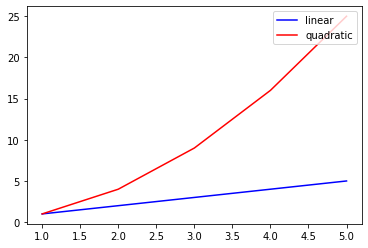

In [7]:
def legend_example():
    """
    Plot an example with two curves with legends
    """
    xvals = [1, 2, 3, 4, 5]
    yvals1 = [1, 2, 3, 4, 5]
    yvals2 = [1, 4, 9, 16, 25]

    plt.plot(xvals, yvals1, '-b', label='linear')
    plt.plot(xvals, yvals2, '-r', label='quadratic')
    plt.legend(loc='upper right')
    plt.show()

legend_example()

In [8]:
er = make_er_graph(1239, 0.9975)

In [9]:
er_ran = random_order(er)

In [10]:
net_ran = random_order(exam_network)

In [11]:
sum_er = 0
for edge in er.values():
    sum_er += len(edge)
    
print(sum_er / 2)    

3777.0


In [12]:
upa = UPATrial(5)
upa_dict = {}
for node in range(5):
    upa_dict[node] = set([con for con in range(5) if node != con])
for node in range(5, 1239):
    upa_dict[node] = upa.run_trial(3)
    for neighbor in upa_dict[node]:
        upa_dict[neighbor].add(node)
sum_upa = 0
for edge in upa_dict.values():
    sum_upa += len(edge)
print(upa_dict)   
print(sum_upa)   

{0: {1, 2, 3, 4, 129, 257, 7, 388, 518, 650, 1154, 141, 273, 785, 786, 20, 22, 24, 282, 155, 669, 546, 38, 1025, 1063, 44, 556, 46, 47, 564, 55, 313, 60, 61, 62, 191, 64, 322, 450, 837, 72, 329, 74, 587, 1100, 1224, 78, 80, 593, 210, 85, 213, 216, 219, 92, 859, 351, 607, 353, 609, 100, 231, 107, 110, 494, 624, 243, 121, 123, 1020, 255}, 1: {0, 2, 3, 4, 5, 6, 7, 388, 9, 10, 11, 137, 140, 390, 783, 16, 528, 18, 658, 786, 533, 22, 23, 408, 25, 26, 27, 920, 29, 32, 544, 290, 1186, 1060, 37, 38, 677, 1187, 1193, 44, 301, 46, 51, 820, 53, 56, 697, 58, 188, 961, 66, 834, 1092, 70, 333, 81, 1236, 472, 1112, 346, 1114, 604, 221, 359, 744, 106, 363, 1005, 499, 884, 246, 914, 1146, 124}, 2: {0, 1, 256, 3, 4, 261, 6, 387, 389, 777, 10, 13, 142, 144, 146, 404, 22, 667, 288, 34, 1153, 43, 563, 52, 565, 54, 55, 189, 62, 449, 76, 336, 595, 852, 343, 1112, 345, 607, 357, 871, 366, 878, 370, 504, 1144}, 3: {0, 1, 2, 4, 516, 900, 7, 9, 12, 13, 269, 401, 18, 1149, 1048, 281, 28, 1052, 1055, 288, 416, 162,

In [13]:
upa_ran = random_order(upa_dict)


Text(0, 0.5, 'largest cc size ')

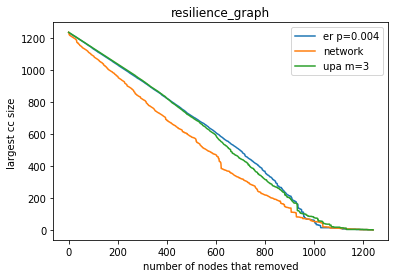

In [14]:

er_res = compute_resilience(er, er_ran)
#print(er_res)
remove_node_list = [node for node in range(1240)]
plt.plot(remove_node_list, er_res, label = 'er p=0.004')
net_res = compute_resilience(exam_network, net_ran)
#print(net_res)
plt.plot(remove_node_list, net_res, label = 'network')
upa_res = compute_resilience(upa_dict, upa_ran)
plt.plot(remove_node_list, upa_res, label = 'upa m=3')
plt.legend(loc='upper right')
plt.title('resilience_graph')
plt.xlabel('number of nodes that removed')
plt.ylabel('largest cc size ')
#plt.show()

In [15]:
def fast_targeted_order(ugraph):
    ugraph = copy_graph(ugraph)
    degree_set = {}
    for node in range(len(ugraph.keys())):
        degree_set[node] = set([])
    for node in range(len(ugraph.keys())):   
        degree = len(ugraph[node])
        degree_set[degree].add(node)
    target_list = [0 for node in range(1239)]
    i = 0
    for degree in range(len(ugraph)-1, -1, -1):
        while degree_set[degree] != set([]):
            ran_node = random.choice(list(degree_set[degree]))
            degree_set[degree].remove(ran_node)
            for neighbor in ugraph[ran_node]:
                nei_degree = len(ugraph[neighbor])
                degree_set[nei_degree].remove(neighbor)
                if nei_degree > 0:
                    degree_set[nei_degree - 1].add(neighbor)
            
            target_list[i] = ran_node
            i += 1
            delete_node(ugraph, ran_node)
            
    return target_list
    
        
        

In [16]:
upa = UPATrial(5)
upa_dict = {}
for node in range(5):
    upa_dict[node] = set([con for con in range(5) if node != con])
for node in range(5, 1239):
    upa_dict[node] = upa.run_trial(5)
    for neighbor in upa_dict[node]:
        upa_dict[neighbor].add(node)

print((fast_targeted_order(upa_dict)))

[3, 17, 0, 19, 5, 8, 13, 20, 11, 6, 4, 1, 28, 54, 12, 9, 10, 29, 2, 7, 21, 48, 16, 30, 39, 164, 84, 101, 34, 50, 25, 15, 53, 86, 22, 72, 75, 58, 119, 41, 90, 114, 124, 23, 148, 105, 26, 78, 14, 104, 207, 107, 62, 79, 133, 161, 165, 116, 18, 43, 40, 120, 49, 203, 88, 89, 24, 110, 56, 87, 60, 117, 126, 66, 35, 96, 217, 171, 51, 453, 231, 163, 81, 85, 64, 77, 46, 92, 129, 103, 169, 47, 190, 93, 31, 186, 315, 200, 578, 61, 44, 65, 113, 232, 137, 76, 170, 122, 192, 256, 59, 156, 68, 330, 314, 365, 195, 348, 32, 152, 147, 143, 97, 45, 391, 528, 36, 111, 310, 139, 446, 184, 401, 131, 389, 37, 270, 150, 288, 447, 438, 74, 135, 222, 549, 593, 128, 202, 158, 67, 82, 308, 215, 240, 325, 268, 517, 422, 251, 213, 307, 172, 266, 212, 121, 637, 42, 218, 410, 397, 63, 127, 191, 185, 855, 290, 264, 326, 404, 157, 331, 257, 194, 440, 209, 491, 208, 175, 535, 575, 739, 52, 180, 230, 387, 162, 226, 420, 625, 313, 1035, 542, 473, 316, 433, 436, 263, 327, 358, 289, 312, 461, 95, 299, 183, 503, 220, 108, 785

In [17]:
import timeit
fast_time = []
ord_time = []
x = [n for n in range(10, 1000, 10)]
for n in range(10, 1000, 10):
    upa = UPATrial(5)      
    upa_dict = {}
    for node in range(5):
        upa_dict[node] = set([con for con in range(5) if node != con])
    for node in range(5, n):
        upa_dict[node] = upa.run_trial(5)
        for neighbor in upa_dict[node]:
            upa_dict[neighbor].add(node)    
    time_fast = timeit.timeit(stmt = 'fast_targeted_order(upa_dict)',globals=globals(), number = 1)
    time_ord = timeit.timeit(stmt = 'targeted_order(upa_dict)',globals=globals(), number = 1)
    fast_time.append(time_fast)
    ord_time.append(time_ord)
    


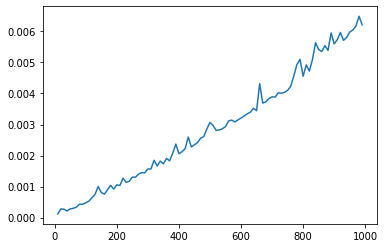

In [18]:
plt.plot(x, fast_time, label = 'fast_targeted_order')

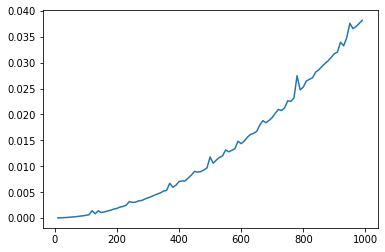

In [19]:
plt.plot(x, ord_time, label = 'targeted_order')

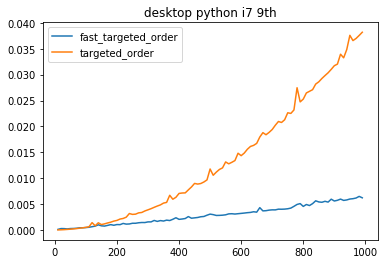

In [20]:
plt.plot(x, fast_time, label = 'fast_targeted_order')
plt.plot(x, ord_time, label = 'targeted_order')
plt.legend()
plt.title('desktop python i7 9th')
plt.show()

In [21]:
exam_network = load_graph(NETWORK_URL)
fast_att_exam = targeted_order(exam_network)
res_exam = compute_resilience(exam_network, fast_att_exam)


Loaded graph with 1239 nodes


In [22]:
fast_att_er = fast_targeted_order(er)


In [23]:
res_er_fast = compute_resilience(er, fast_att_er)

In [24]:
node_list = [n for n in range(1240)]


In [25]:
# upa = UPATrial(3)
# upa_dict = {}
# for node in range(3):
#     upa_dict[node] = set([con for con in range(3) if node != con])
# for node in range(3, 1239):
#     upa_dict[node] = upa.run_trial(3)
#     for neighbor in upa_dict[node]:
#         upa_dict[neighbor].add(node)


In [26]:
fast_att_upa = fast_targeted_order(upa_dict)

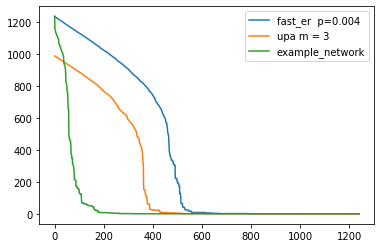

In [28]:
res_upa_fast = compute_resilience(upa_dict, fast_att_upa)
plt.plot(node_list, res_er_fast, label='fast_er  p=0.004')
plt.plot(node_list, res_upa_fast, label='upa m = 3')
plt.plot(node_list, res_exam, label = 'example_network')
plt.legend()
plt.show()